# Exploring data from [SeKlima](seklima.met.no)

#### Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import windrose as wr

from dataclasses import dataclass

%matplotlib inline

#### Load and explore example data from weather station

_skriv noe om csv-format + filer fra seklima_

In [2]:
# file path to example data
path = "../data/sunndalsora.csv"
# load data into pandas DataFrame
df = pd.read_csv(path)

Let's have a look at the data

In [3]:
# print a sample of the data
df.sample(5)

,Navn,Stasjon,Tid,Nedbør,Lufttemperatur,Vindretning,Middelvind
60294,Sunndalsøra III,SN63420,13.10.2016 18:00,NaN,0.0,114.0,2.0
38160,Sunndalsøra III,SN63420,05.04.2014 08:00,NaN,3.0,99.0,2.2
43160,Sunndalsøra III,SN63420,30.10.2014 19:00,NaN,3.8,99.0,1.3
55759,Sunndalsøra III,SN63420,07.04.2016 18:00,NaN,5.2,254.0,4.4
71189,Sunndalsøra III,SN63420,04.07.2018 19:00,NaN,20.6,296.0,4.9


In [4]:
# print basic statistics
df.describe(include="all")

,Navn,Stasjon,Tid,Nedbør,Lufttemperatur,Vindretning,Middelvind
count,79981,79981,79981,25820.000000,74912.000000,79752.000000,79742.000000
unique,1,1,79981,NaN,NaN,NaN,NaN
top,Sunndalsøra III,SN63420,25.10.2019 08:00,NaN,NaN,NaN,NaN
freq,79981,79981,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.137920,8.950691,200.552212,4.436501
std,NaN,NaN,NaN,0.484024,5.755643,91.496774,2.425328
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,4.100000,121.000000,2.700000
50%,NaN,NaN,NaN,0.000000,8.500000,181.000000,4.000000
75%,NaN,NaN,NaN,0.000000,13.000000,298.000000,5.700000


In [5]:
# remove rows with missing data
df.dropna(inplace=True)
df.reset_index(inplace=True)

#### Let's test the windrose package

In [6]:
# filter dataframe by air temperature
# rain: air temperature > threshold deg C, precipitation >= 1
# snow : air temperature <= threshold deg C, precipitation >= 1
threshold = 5
df_rain = df[(df["Lufttemperatur"] > threshold) & (df["Nedbør"] >= 1)]
df_snow = df[(df["Lufttemperatur"] <= threshold) & (df["Nedbør"] >= 1)]

In [7]:
@dataclass
class WindrosePlot:

    title: str
    wind_direction: pd.Series
    observation: pd.Series
    legend_title: str
    cmap: mpl.cm = mpl.cm.viridis


In [8]:
speed_plot = WindrosePlot(
    title="Sunndalsøra III %-vis fordeling av vindretning og vindstyrke",
    wind_direction=df["Vindretning"],
    observation=df["Middelvind"],
    legend_title="Vindstyrke [m/s]",
    cmap=mpl.cm.viridis
)

rain_plot = WindrosePlot(
    title="Sunndalsøra III %-vis fordeling av vindretning og regn",
    wind_direction=df_rain["Vindretning"],
    observation=df_rain["Nedbør"],
    legend_title="Regn [mm/h]",
    cmap=mpl.cm.viridis
)

snow_plot = WindrosePlot(
    title="Sunndalsøra III %-vis fordeling av vindretning og snø",
    wind_direction=df_snow["Vindretning"],
    observation=df_snow["Nedbør"],
    legend_title="Snø [mm/h]",
    cmap=mpl.cm.viridis
)

plots = [speed_plot, rain_plot, snow_plot]

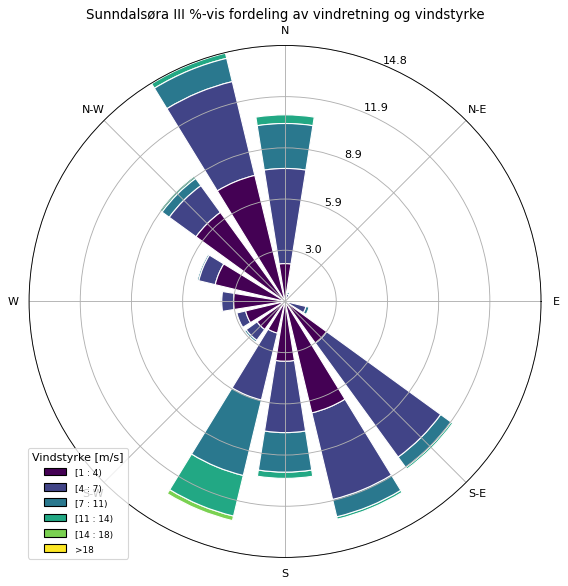

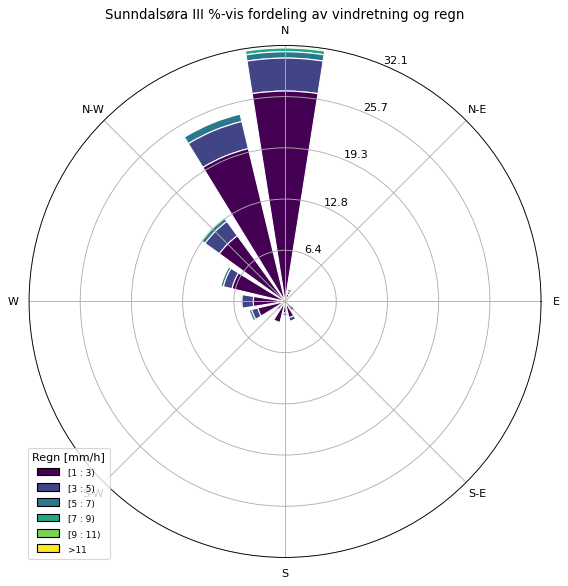

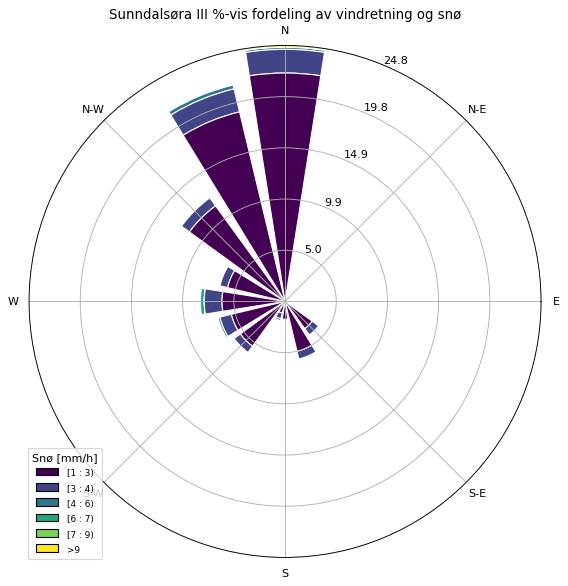

In [9]:
plt.hist([0, 1])
plt.close()
for plot in plots:
    ax = wr.WindroseAxes.from_ax()
    ax.bar(
        plot.wind_direction,
        plot.observation,
        normed=True,
        opening=0.8,
        edgecolor="white",
        cmap=plot.cmap
    )
    ax.set_legend(
        title=plot.legend_title,
        loc="lower left",
        decimal_places=0
    )
    ax.set_title(plot.title)
    plt.savefig(f"../figures/{plot.title}.png")